In [192]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd
import heapq


In [193]:
sns.set('talk')

In [194]:
with open('life-expectancy-vs-gdp-per-capita.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    print('Affichage des lignes du tableau',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ...



Affichage des lignes du tableau


In [195]:
del tableau[1]


In [196]:
for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2015):
        del tableau[i]
tableau

[['Entity',
  'Code',
  'Year',
  'Total population (Gapminder, HYDE & UN)',
  'Continent',
  'Life expectancy',
  'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'],
 ['Afghanistan', 'AFG', '2015', '34414000', 'Asia', '63.377', '1928'],
 ['Africa', '', '2015', '1182439040', '', '61.607', '4684'],
 ['Akrotiri and Dhekelia', 'OWID_AKD', '2015', '', 'Asia', '', ''],
 ['Albania', 'ALB', '2015', '2891000', 'Europe', '78.025', '10947'],
 ['Algeria', 'DZA', '2015', '39728000', 'Africa', '76.09', '13024'],
 ['American Samoa', 'ASM', '2015', '56000', 'Oceania', '73.588', ''],
 ['Americas', '', '2015', '', '', '76.44286453', ''],
 ['Andorra', 'AND', '2015', '78000', 'Europe', '83.073', ''],
 ['Angola', 'AGO', '2015', '27884000', 'Africa', '59.398', '8631'],
 ['Anguilla', 'AIA', '2015', '14000', 'North America', '81.332', ''],
 ['Antarctica', 'ATA', '2015', '', 'Antarctica', '', ''],
 ['Antigua and Barbuda',
  'ATG',
  '2015',
  '94000',
  'North America',


In [197]:
gdp=[]
life_expectancy=[]
labels=[]
population=[]
population_plot=[]
continent =[]
color=[]
for i in range (len(tableau)):
    gdp.append(tableau[i][6])
    labels.append(tableau[i][0])
    life_expectancy.append(tableau[i][5])
    population.append(tableau[i][3])
    continent.append(tableau[i][4])
print(len(gdp),len(life_expectancy),len(labels),len(population))

for i in reversed(range(1,len(gdp))):
    k=tableau[i][6]
    l=tableau[i][5]
    m=tableau[i][1]
    n=tableau[i][4]
    if(k=='' or l=='' or m=='' or n ==''):
        del gdp[i]
        del life_expectancy[i]
        del labels[i]
        del population[i]
        del continent[i]

for i in range(1,len(gdp)):
    if (continent[i]== 'Europe'):
        color.append("red")
    if (continent[i]== 'Asia'):
        color.append("blue")
    if (continent[i]== 'Africa'):
        color.append("green")
    if (continent[i]== 'North America'):
        color.append("purple")
    if (continent[i]=='South America'):
        color.append("orange")
    if (continent[i]== 'Oceania'):
        color.append("beige")
    if (continent[i]== 'Antarctica'):
        color.append("brown")


303 303 303 303


In [198]:
best_countries=[]
best_lifeExpt=[]
dataFrameG=[]
for i in range(1,len(life_expectancy)):
    gdp[i]=int(gdp[i])
    life_expectancy[i]=float(life_expectancy[i])
    population_plot.append(int(population[i])/1000000)
print(len(gdp),len(life_expectancy),len(color),len(population_plot))

lifexpt_mean=np.mean(life_expectancy[1:])
std_lifexpt=np.std(life_expectancy[1:])
stand_abobeMean=lifexpt_mean+std_lifexpt


del life_expectancy[0]
del labels[0]
del gdp[0]

for i in range(len(life_expectancy)):
    if (life_expectancy[i]>stand_abobeMean):
        best_countries.append(labels[i])
        best_lifeExpt.append(life_expectancy[i])
    
        
dataFrameG=np.vstack(( best_countries,best_lifeExpt))
Test=np.transpose(dataFrameG)
columns = ['Country','Life Expectancy']
df = pd.DataFrame(data=Test,columns=columns)

df.style.format("{:.20}")



167 167 166 166


,Country,Life Expectancy
0,Australia,82.794
1,Austria,81.182
2,Belgium,80.969
3,Canada,82.026
4,Cyprus,80.35
5,Denmark,80.475
6,Finland,81.196
7,France,82.224
8,Germany,80.77
9,Greece,81.548


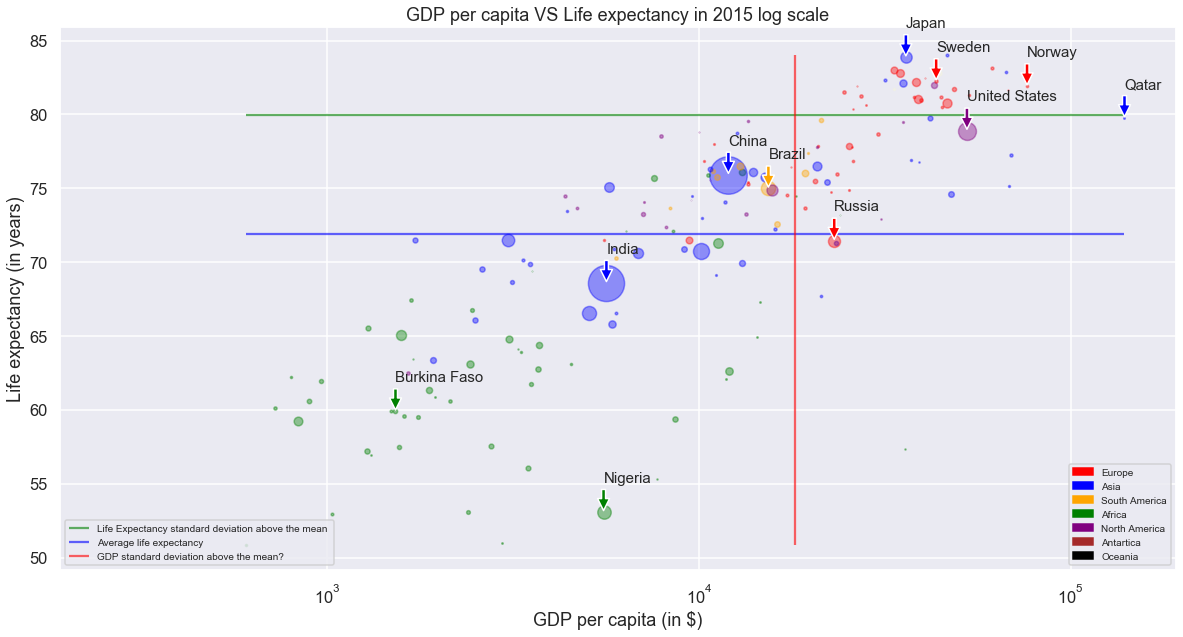

In [199]:
#population
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xscale("log")


for i in range((len(gdp))): 
    ax.scatter(gdp[i],life_expectancy[i],c=color[i],s=population_plot[i],alpha=0.4)
    if (labels[i]=='China' or labels[i]=='Japan'or labels[i]=='Sweden' or labels[i]=='Norway'
        or labels[i]=='Nigeria' or labels[i]=='Burkina Faso' or labels[i]=='Qatar'or labels[i]=='India'
        or labels[i]=='Brazil'or labels[i]=='United States'or labels[i]=='Russia'):
        ax.annotate(labels[i],(gdp[i], life_expectancy[i]),xytext=(gdp[i],life_expectancy[i]+2),fontsize=15, arrowprops=dict(facecolor=color[i], shrink=0.05))
   
ax.hlines(stand_abobeMean,np.min(gdp),np.max(gdp), color='green',alpha=0.6,label='Life Expectancy standard deviation above the mean ')
ax.hlines(np.mean(life_expectancy),np.min(gdp),np.max(gdp), color='blue',alpha=0.6,label='Average life expectancy')
ax.vlines(np.mean(gdp),(np.min(life_expectancy)),np.max(life_expectancy), color='red',alpha=0.6,label='GDP standard deviation above the mean?')



ax.set_xlabel('GDP per capita (in $)')
ax.set_ylabel('Life expectancy (in years)')
ax.set_title('GDP per capita VS Life expectancy in 2015 log scale')
leg1=ax.legend(prop={"size":10},loc='lower left')


red_patch = mpatches.Patch(color='red', label='Europe')
blue_patch = mpatches.Patch(color='blue', label='Asia')
orange_patch = mpatches.Patch(color='orange', label='South America')
green_patch = mpatches.Patch(color='green', label='Africa')
purple_patch = mpatches.Patch(color='purple', label='North America')
brown_patch = mpatches.Patch(color='brown', label='Antartica')
beige_patch = mpatches.Patch(color='black', label='Oceania')

leg2=ax.legend(handles=[red_patch,blue_patch,orange_patch,green_patch,purple_patch,brown_patch,beige_patch],prop={"size":10},loc='lower right')

ax.add_artist(leg1)
del population[0]

In [200]:
# e High life but low gdp
mix_countries=[]
high_lifeExpt=[]
low_GDP=[]
dataFrameM=[]
lim_gdp=9000
lim_exp=70
for i in range((len(gdp))):
    if (gdp[i]<lim_gdp and life_expectancy[i]>lim_exp):
        mix_countries.append(labels[i])
        low_GDP.append(gdp[i])
        high_lifeExpt.append(life_expectancy[i])
        
        
dataFrameM=np.vstack(( mix_countries,low_GDP,high_lifeExpt))
Test=np.transpose(dataFrameM)
columns = ['Country','GDP','Life Expectancy',]
df = pd.DataFrame(data=Test,columns=columns)

df.style.format("{:.20}")



,Country,GDP,Life Expectancy
0,Bangladesh,3068,71.514
1,Bolivia,5969,70.277
2,Cape Verde,6358,72.117
3,Cuba,7889,78.561
4,El Salvador,8163,72.412
5,Guatemala,7055,73.25
6,Honduras,4352,74.495
7,Jamaica,7115,74.098
8,Kyrgyzstan,5910,70.876
9,Libya,8514,72.121


['India', 'Russia']

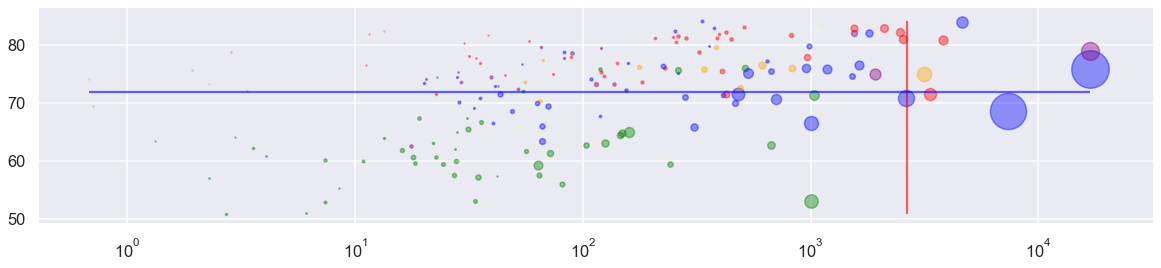

In [201]:
#f 
inequal_country=[]
inequal_lifeExp=[]
highLE_LowGDP_C=[]
highLE_LowGDP=[]
fig2,ax2 = plt.subplots(1, 1, figsize=(20, 4))
ax2.set_xscale("log")
total_gdp=[]
treshold_e=40

for i in range(len(gdp)):
    total_gdp.append(int(gdp[i])*int(population[i])/1000000000)
test=np.std(total_gdp)+np.mean(total_gdp)
for i in range((len(gdp))): 
    ax2.scatter(total_gdp[i],life_expectancy[i],c=color[i],s=population_plot[i],alpha=0.4)

for i in range(len(life_expectancy)):
    if (life_expectancy[i]<np.mean(life_expectancy) and total_gdp[i]>test):
        inequal_country.append(labels[i])
        inequal_lifeExp.append(life_expectancy[i])
        
#ax2.hlines(stand_abobeMean,np.min(gdp),np.max(gdp), color='green',alpha=0.6,label='Life Expectancy standard deviation above the mean ')
#ax2.hlines(np.mean(life_expectancy),np.min(gdp),np.max(gdp), color='blue',alpha=0.6,label='Average life expectancy')
ax2.vlines((np.mean(total_gdp)+np.std(total_gdp)),(np.min(life_expectancy)),np.max(life_expectancy), color='red',alpha=0.6,label='GDP standard deviation above the mean? + One std')
ax2.hlines(np.mean(life_expectancy),np.min(total_gdp),np.max(total_gdp), color='blue',alpha=0.6,label='Average life expectancy')
inequal_country

In [202]:
#Part 2
with open('suicide-rate.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    print('Affichage des lignes du tableau',end='\n')
    for ligne in lire:                            #Pour chaque ligne... 
        #print(ligne, end='\n')                    #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ...


Affichage des lignes du tableau


In [203]:
del tableau[0]

In [204]:
for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2016):
        del tableau[i]

In [205]:
labels=[]
suicidal_rate=[]

color=[]
for i in range (len(tableau)):
    labels.append(tableau[i][0])
    suicidal_rate.append(tableau[i][3])

for i in reversed(range(1,len(labels))):
    k=tableau[i][0]
    l=tableau[i][3]
    if(k=='' or l=='' ):
        del labels[i]
        del suicidal_rate[i]



In [206]:
countries=[]
most_suicide=heapq.nlargest(100, suicidal_rate)
for i in range (len(tableau)):
    for j in range (len(most_suicide)):
        if suicidal_rate[i]==most_suicide[j]:
            countries.append(labels[i])
            


In [207]:
dataFrameZ=np.vstack((labels,suicidal_rate))
Test=np.transpose(dataFrameZ)
columns = ['Country','Suicidal rate',]
df = pd.DataFrame(data=Test,columns=columns)
df['Suicidal rate']=df['Suicidal rate'].astype('float64')
df.style.format("{:.20}")

,Country,Suicidal rate
0,Afghanistan,5.7000000000000001776
1,Afghanistan,4.7000000000000001776
2,Albania,6.2999999999999998224
3,Algeria,3.2000000000000001776
4,Angola,4.7000000000000001776
5,Antigua and Barbuda,0.5
6,Argentina,9.1999999999999992895
7,Armenia,6.5999999999999996447
8,Australia,13.199999999999999289
9,Austria,15.599999999999999645


In [208]:
# Ten largest values in column Suicidal rate
df.nlargest(30,'Suicidal rate') 


,Country,Suicidal rate
97,Lithuania,31.900000
138,Russia,31.000000
71,Guyana,29.200000
156,South Korea,26.900000
15,Belarus,26.200000
161,Suriname,22.800000
86,Kazakhstan,22.500000
177,Ukraine,22.400000
92,Latvia,21.200000
94,Lesotho,21.200000


In [209]:
df.nsmallest(20,'Suicidal rate') 


,Country,Suicidal rate
5,Antigua and Barbuda,0.5
14,Barbados,0.8
11,Bahamas,1.7
67,Grenada,1.7
165,Syrian Arab Republic,1.9
83,Jamaica,2.2
89,Kuwait,2.3
103,Maldives,2.3
143,Sao Tome and Principe,2.3
141,Saint Vincent and the Grenadines,2.4


In [210]:
#Part 2
with open('global-hunger-index.csv',newline='') as f:         #Ouverture du fichier CSV
    tableau=[]
    lire=csv.reader(f)                            #chargement des lignes du fichier csv
    print('',end='\n')
    for ligne in lire:                            #Pour chaque ligne...                #...affichage de la ligne dans la console ...
        tableau.append(ligne)                     #...on ajoute la ligne dans la liste ..

In [211]:
del tableau[0]

In [212]:
for i in reversed(range(1,len(tableau))):
    k=tableau[i][2]
    k=int(k)
    if(k!=2018):
        del tableau[i]

In [213]:
labels=[]
hunger_rate=[]

color=[]
for i in range (len(tableau)):
    labels.append(tableau[i][0])
    hunger_rate.append(tableau[i][3])

for i in reversed(range(1,len(labels))):
    k=tableau[i][0]
    l=tableau[i][3]
    if(k=='' or l=='' ):
        del labels[i]
        del hunger_rate[i]



In [220]:
countries=[]
most_hunger=heapq.nlargest(100, hunger_rate)
for i in range (len(tableau)):
    for j in range (len(most_hunger)):
        if suicidal_rate[i]==most_hunger[j]:
            countries.append(labels[i])
            


In [227]:
dataFrameH=np.vstack((labels,hunger_rate))
Test=np.transpose(dataFrameH)
columns = ['Country','Hunger rate',]
dh = pd.DataFrame(data=Test,columns=columns)
dh['Hunger rate']=dh['Hunger rate'].astype('float64')
dh.style.format("{:.20}");

In [228]:
dh.nlargest(30,'Hunger rate')

,Country,Hunger rate
17,Central African Republic,53.7
0,Afghanistan,49.3
18,Chad,45.4
102,Yemen,39.7
55,Madagascar,38.0
103,Zambia,37.6
84,Sierra Leone,35.7
39,Haiti,35.4
88,Sudan,34.8
1,Afghanistan,34.3


In [229]:
dh.nsmallest(30,'Hunger rate')

,Country,Hunger rate
13,Bulgaria,5.0
85,Slovakia,5.0
5,Argentina,5.3
47,Kazakhstan,5.5
54,Macedonia,5.9
79,Russia,6.1
61,Mexico,6.5
83,Serbia,6.5
43,Iran,7.3
6,Armenia,7.6
